In [1]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
!unzip /content/drive/MyDrive/Sih/Medicinalplantdataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Medicinal plant dataset/Avacado/5644.jpg  
  inflating: Medicinal plant dataset/Avacado/5645.jpg  
  inflating: Medicinal plant dataset/Avacado/5646.jpg  
  inflating: Medicinal plant dataset/Avacado/5647.jpg  
  inflating: Medicinal plant dataset/Avacado/5648.jpg  
  inflating: Medicinal plant dataset/Avacado/5649.jpg  
  inflating: Medicinal plant dataset/Avacado/5650.jpg  
  inflating: Medicinal plant dataset/Avacado/5651.jpg  
  inflating: Medicinal plant dataset/Avacado/5652.jpg  
  inflating: Medicinal plant dataset/Avacado/5653.jpg  
  inflating: Medicinal plant dataset/Avacado/5654.jpg  
  inflating: Medicinal plant dataset/Avacado/5655.jpg  
  inflating: Medicinal plant dataset/Avacado/5656.jpg  
  inflating: Medicinal plant dataset/Avacado/5657.jpg  
  inflating: Medicinal plant dataset/Avacado/5658.jpg  
  inflating: Medicinal plant dataset/Avacado/5659.jpg  
  inflating: Medicinal plant dataset/Avacado/5660.jpg

In [3]:
dataset = '/content/Medicinal plant dataset'

In [4]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, brightness_range=[0.2, 1.0], horizontal_flip=True,validation_split=0.2)
train_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='training', shuffle=True)
test_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='validation', shuffle=True)

Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.


In [9]:
input = Input(shape=(224, 224, 3))
model = Xception(include_top=False, weights='imagenet', input_tensor=input)
model.trainable=True
# for layers in model.layers[-1:-5:-1]:
#   layers.trainable=True

In [10]:
output = model.output
x = Flatten()(output)
x = Dense(1024, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
output = Dense(40, activation='softmax')(x)

In [11]:
model = keras.Model(inputs=input, outputs=output)

In [12]:
# lr_schedule = keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# callbacks=[lr_schedule]
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.09)

model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

res_history = model.fit(train_imgs, epochs=10,validation_data=test_imgs, callbacks = callbacks)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.3058 - loss: 2.6992
Epoch 1: val_accuracy improved from -inf to 0.72458, saving model to best_model.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.3072 - loss: 2.6934 - val_accuracy: 0.7246 - val_loss: 0.9487
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.8214 - loss: 0.6029
Epoch 2: val_accuracy improved from 0.72458 to 0.87288, saving model to best_model.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 178s 919ms/step - accuracy: 0.8216 - loss: 0.6023 - val_accuracy: 0.8729 - val_loss: 0.3988
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.9105 - loss: 0.2879
Epoch 3: val_accuracy improved from 0.87288 to 0.90678, saving model to best_model.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 129s 850ms/step - accuracy: 0.9105 - loss: 0.2879 - val_accuracy: 0.9068 - val_loss: 0.3045
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.9388 - loss: 0.1881
Epoch 4: val_accuracy improved from

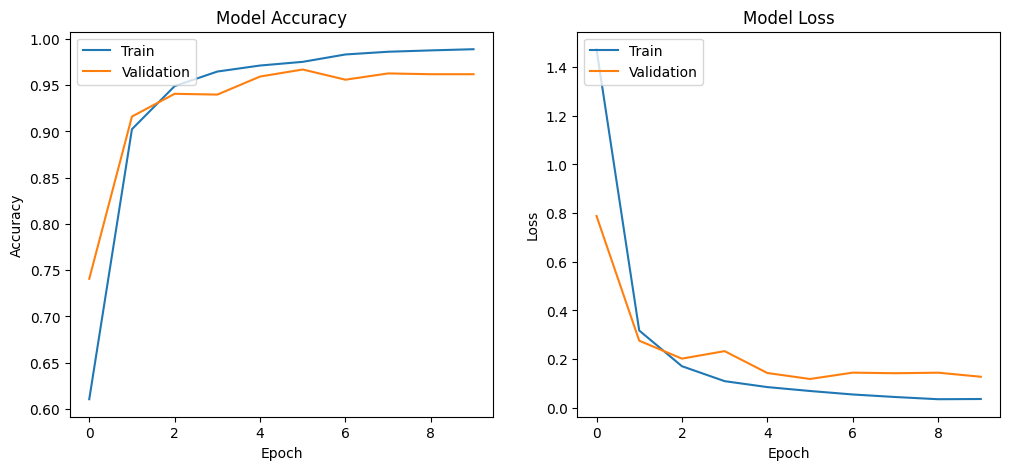

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(res_history.history['accuracy'])
plt.plot(res_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(res_history.history['loss'])
plt.plot(res_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [13]:
resent = keras.models.load_model("/content/best_model.keras")

In [14]:
resent.save("/content/drive/MyDrive/Sih/Xception_new.keras")

In [ ]:
res_input = Input(shape=(224, 224, 3))
res_model = ResNet50(include_top=False, weights='imagenet', input_tensor=res_input)
res_model.trainable=True
res_output = res_model.output
res_x = Flatten()(res_output)
res_x = Dense(1024, activation='relu')(res_x)
# x = Dense(512, activation='relu')(x)
res_final = Dense(40, activation='softmax')(res_x)
res_model = keras.Model(inputs=res_input, outputs=res_final)
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_res_model_.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.09)

res_model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

res_history_ = res_model.fit(train_imgs, epochs=20,validation_data=test_imgs, callbacks = callbacks)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.3105 - loss: 5.5404
Epoch 1: val_accuracy improved from -inf to 0.02458, saving model to best_res_model_.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.3119 - loss: 5.5210 - val_accuracy: 0.0246 - val_loss: 4.3813
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.8331 - loss: 0.5170
Epoch 2: val_accuracy did not improve from 0.02458
149/149 ━━━━━━━━━━━━━━━━━━━━ 125s 710ms/step - accuracy: 0.8333 - loss: 0.5166 - val_accuracy: 0.0246 - val_loss: 11.1453
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9240 - loss: 0.2361
Epoch 3: val_accuracy did not improve from 0.02458
149/149 ━━━━━━━━━━━━━━━━━━━━ 105s 682ms/step - accuracy: 0.9240 - loss: 0.2361 - val_accuracy: 0.0246 - val_loss: 10.4019
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.9532 - loss: 0.1360
Epoch 4: val_accuracy did not improve from 0.02458
149/149 ━━━━━━━━━━━━━━━━━━━━ 103s 673ms/step - accura

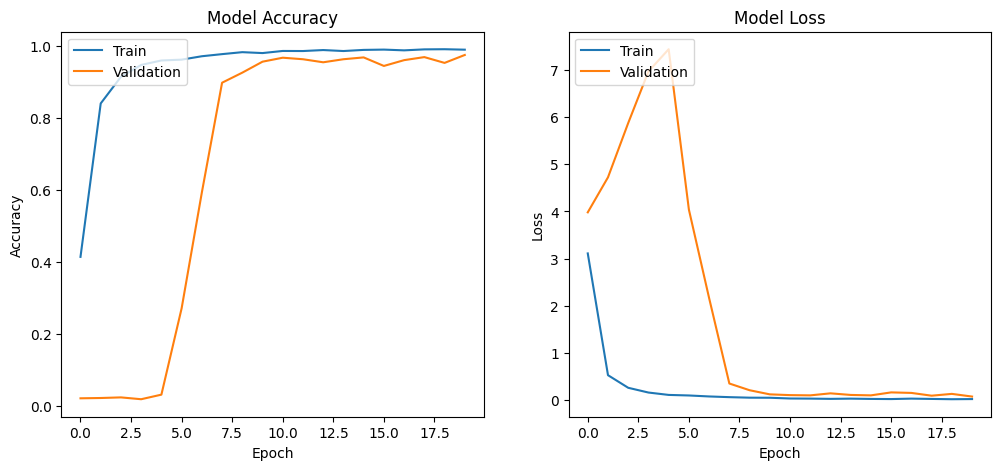

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(res_history_.history['accuracy'])
plt.plot(res_history_.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(res_history_.history['loss'])
plt.plot(res_history_.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
results = plants_model.evaluate(test_imgs)

accuracy = results[1]
print("Accuracy: {:.2f}%".format(accuracy * 100))


38/38 [==============================] - 38s 934ms/step - loss: 0.1935 - accuracy: 0.9437
Accuracy: 94.37%


In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, brightness_range=[0.2, 1.0], horizontal_flip=True)
imgs = data_gen.flow_from_directory(dataset, target_size=(299,299),class_mode='categorical', shuffle=True)

Found 6005 images belonging to 40 classes.


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# Initialize KFold with k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Define your model here (e.g., a simple example)
k = 5  # Number of folds
batch_size = 32
epochs = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
for i in range(11):
# Extract the data and labels from the data generator
  data, labels = test_imgs.next()

# Initialize StratifiedKFold with k folds
# kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


# Loop through each fold
  for fold_num, (train_indices, val_indices) in enumerate(kf.split(data, np.argmax(labels, axis=1))):
      print(f"Fold {fold_num + 1}/{k}")

      # Split the data into training and validation sets for this fold
      x_train, y_train = data[train_indices], labels[train_indices]
      x_val, y_val = data[val_indices], labels[val_indices]

      # Train your model on the training data for this fold
      # history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

      # Evaluate the model on the validation data for this fold
      loss, accuracy = plants_model.evaluate(x_val, y_val)
      print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Calculate and print the mean and standard deviation of validation accuracies across folds
# You can also save these accuracies to analyze further.



Fold 1/10
1/1 [==============================] - 0s 81ms/step - loss: 0.0718 - accuracy: 1.0000
Validation Accuracy: 100.00%
Fold 2/10
1/1 [==============================] - 0s 89ms/step - loss: 0.0289 - accuracy: 1.0000
Validation Accuracy: 100.00%
Fold 3/10
1/1 [==============================] - 0s 71ms/step - loss: 0.5155 - accuracy: 0.6667
Validation Accuracy: 66.67%
Fold 4/10
1/1 [==============================] - 0s 68ms/step - loss: 0.0979 - accuracy: 1.0000
Validation Accuracy: 100.00%
Fold 5/10
1/1 [==============================] - 0s 71ms/step - loss: 0.0174 - accuracy: 1.0000
Validation Accuracy: 100.00%
Fold 6/10
1/1 [==============================] - 0s 71ms/step - loss: 0.2362 - accuracy: 1.0000
Validation Accuracy: 100.00%
Fold 7/10
1/1 [==============================] - 0s 68ms/step - loss: 0.0046 - accuracy: 1.0000
Validation Accuracy: 100.00%
Fold 8/10
1/1 [==============================] - 0s 70ms/step - loss: 0.0011 - accuracy: 1.0000
Validation Accuracy: 100.00%
F

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plants_model = keras.models.load_model('/content/drive/MyDrive/SIH 2023/PlantsModel.h5')

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, accuracy_score

# plants_model = keras.models.load_model('/content/drive/MyDrive/SIH 2023/PlantsModel.h5')  # Replace with your loaded model

data_directory = '/content/drive/MyDrive/SIH 2023/Medicinal plant dataset'

rescale_factor = 1.0 / 255.0
rotation_range = 180
brightness_range = (0.2, 1.0)
horizontal_flip = True

transformed_images = []
true_labels = []

class_folders = sorted(os.listdir(data_directory))
for class_name in class_folders:
    class_directory = os.path.join(data_directory, class_name)

    for image_filename in os.listdir(class_directory):
        image_path = os.path.join(class_directory, image_filename)

        image = load_img(image_path, target_size=(299, 299))
        image = img_to_array(image)

        image *= rescale_factor

        if rotation_range:
            angle = np.random.uniform(-rotation_range, rotation_range)
            M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

        if brightness_range:
            brightness_factor = np.random.uniform(brightness_range[0], brightness_range[1])
            image *= brightness_factor
            image = np.clip(image, 0, 255)

        if horizontal_flip and np.random.random() < 0.5:
            image = np.fliplr(image)


        transformed_images.append(image)
        true_labels.append(train_imgs.class_indices[class_name])


    transformed_images = np.array(transformed_images)
    true_labels = np.array(true_labels)


    predictions = plants_model.predict(transformed_images)
    print('\n \n Printing classification report for ', class_name,'\n\n')

    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(true_labels, predicted_labels)
    report = classification_report(true_labels, predicted_labels)
    print("Accuracy:", accuracy)
    print(report)
    transformed_images = []
    true_labels = []


6/6 [==============================] - 2s 248ms/step

 
 Printing classification report for  Aloevera 


Accuracy: 0.9942528735632183
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       174
          32       0.00      0.00      0.00         0

    accuracy                           0.99       174
   macro avg       0.50      0.50      0.50       174
weighted avg       1.00      0.99      1.00       174

5/5 [==============================] - 1s 255ms/step

 
 Printing classification report for  Amla 


Accuracy: 0.952054794520548
              precision    recall  f1-score   support

           1       1.00      0.95      0.98       146
           9       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         0
          29       0.00      0.

0